In [94]:
import os
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import hvplot.pandas

import mplcyberpunk
import matplotlib.pyplot as plt

import seaborn
from matplotlib import style
from datetime import datetime
from datetime import timezone
import pytz
style.use('cyberpunk')

from sklearn.model_selection import train_test_split

In [211]:
data = pd.read_csv('5Y_naver_stock.csv')

In [212]:
data['date'] = data['date'].apply(pd.to_datetime)
data['date'] = data['date'].dt.tz_localize(None)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1231 non-null   datetime64[ns]
 1   date.1             1231 non-null   object        
 2   open               1231 non-null   float64       
 3   high               1231 non-null   float64       
 4   low                1231 non-null   float64       
 5   close              1231 non-null   float64       
 6   volume             1231 non-null   int64         
 7   open_mean_lag3     1231 non-null   float64       
 8   open_mean_lag7     1231 non-null   float64       
 9   open_mean_lag30    1231 non-null   float64       
 10  open_std_lag3      1231 non-null   float64       
 11  open_std_lag7      1231 non-null   float64       
 12  open_std_lag30     1231 non-null   float64       
 13  high_mean_lag3     1231 non-null   float64       
 14  high_mea

In [102]:
data.head()

,date,date.1,open,high,low,close,volume,open_mean_lag3,open_mean_lag7,open_mean_lag30,...,volume_mean_lag7,volume_mean_lag30,volume_std_lag3,volume_std_lag7,volume_std_lag30,month,week,day,day_of_week,1st diff_close
0,2018-03-14,2018-03-14 00:00:00+09:00,162600.0,162800.0,160200.0,161800.0,376640,236843.414634,236773.234611,236267.715622,...,666136.903417,666569.359165,202316.644360,250432.425607,327866.104382,3,11,14,2,NaN
1,2018-03-15,2018-03-15 00:00:00+09:00,162600.0,164800.0,161400.0,164000.0,341525,162600.000000,162600.000000,162600.000000,...,376640.000000,376640.000000,202316.644360,250432.425607,327866.104382,3,11,15,3,2200.0
2,2018-03-16,2018-03-16 00:00:00+09:00,163200.0,163400.0,159400.0,160200.0,717990,162600.000000,162600.000000,162600.000000,...,359082.500000,359082.500000,24830.054621,24830.054621,24830.054621,3,11,16,4,-3800.0
3,2018-03-19,2018-03-19 00:00:00+09:00,160200.0,160400.0,156400.0,157000.0,600070,162800.000000,162800.000000,162800.000000,...,478718.333333,478718.333333,207957.841060,207957.841060,207957.841060,3,12,19,0,-3200.0
4,2018-03-20,2018-03-20 00:00:00+09:00,155400.0,159200.0,154800.0,159000.0,441955,162000.000000,162150.000000,162150.000000,...,509056.250000,509056.250000,192560.180918,180312.319388,180312.319388,3,12,20,1,2000.0


In [103]:
from fbprophet import Prophet

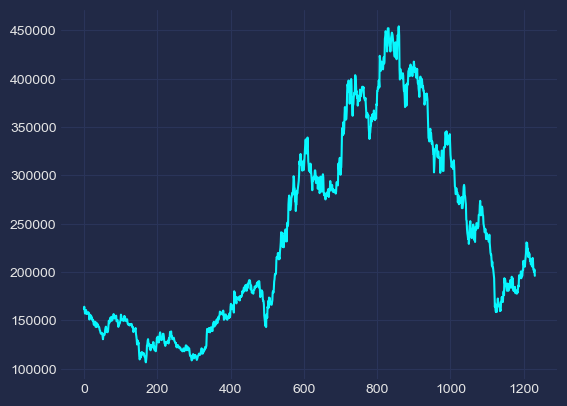

In [104]:
plt.plot(data.close)
plt.show()

In [105]:
data_fb = data.reset_index()[['date','close']].rename({'Timestamp':'ds','close':'y'}, axis=1)
data_fb

,date,y
0,2018-03-14,161800.0
1,2018-03-15,164000.0
2,2018-03-16,160200.0
3,2018-03-19,157000.0
4,2018-03-20,159000.0
...,...,...
1226,2023-03-08,202500.0
1227,2023-03-09,202000.0
1228,2023-03-10,199800.0
1229,2023-03-13,202500.0


In [106]:
train_fb, test_fb = train_test_split(data_fb, test_size=0.1, shuffle=False)

In [107]:
train_fb.shape, test_fb.shape

((1107, 2), (124, 2))

In [213]:
df_train, df_test = train_test_split(data, test_size=0.1, shuffle=False)

In [214]:
df_train.shape, df_test.shape

((1107, 42), (124, 42))

In [110]:
# close에 알맞는 변수 리스트
exogenous_features = ['open_mean_lag3',
                      'open_mean_lag7', 'open_mean_lag30', 'open_std_lag3', 'open_std_lag7',
                      'open_std_lag30', 'high_mean_lag3', 'high_mean_lag7', 'high_mean_lag30',
                      'high_std_lag3', 'high_std_lag7', 'high_std_lag30', 'low_mean_lag3',
                      'low_mean_lag7', 'low_mean_lag30', 'low_std_lag3', 'low_std_lag7',
                      'low_std_lag30', 'close_mean_lag3', 'close_mean_lag7',
                      'close_mean_lag30', 'close_std_lag3', 'close_std_lag7',
                      'close_std_lag30', 'volume_mean_lag3', 'volume_mean_lag7',
                      'volume_mean_lag30', 'volume_std_lag3',
                      'volume_std_lag7', 'volume_std_lag30', 'month', 'week',
                      'day', 'day_of_week']

In [111]:
model_fbprophet = Prophet()
for feature in exogenous_features:
    model_fbprophet.add_regressor(feature)

In [112]:
model_fbprophet

In [113]:
model_fbprophet.fit(df_train[["date", "close"] + exogenous_features].rename(columns={"date": "ds", "close": "y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [114]:
forecast = model_fbprophet.predict(df_test[["date", "close"] + exogenous_features].rename(columns={"date": "ds"}))
forecast.head()

c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.a

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close_mean_lag3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-14,225747.975501,221925.568083,238132.326163,225747.975501,225747.975501,4183.416902,4183.416902,4183.416902,-15593.318586,...,11201.928791,11201.928791,11201.928791,-531.108472,-531.108472,-531.108472,0.0,0.0,0.0,229931.392402
1,2022-09-15,225667.770054,221629.520104,237773.970527,225667.770054,225667.770054,4351.212582,4351.212582,4351.212582,-16590.743951,...,12078.198468,12078.198468,12078.198468,-680.247594,-680.247594,-680.247594,0.0,0.0,0.0,230018.982635
2,2022-09-16,225587.564607,219596.522162,235608.647943,225587.564607,225587.564607,1561.656908,1561.656908,1561.656908,-20580.445409,...,11767.965642,11767.965642,11767.965642,-838.933883,-838.933883,-838.933883,0.0,0.0,0.0,227149.221514
3,2022-09-19,225346.948266,212692.005882,228552.506801,225346.948266,225346.948266,-4561.944240,-4561.944240,-4561.944240,-32882.024904,...,10947.542385,10947.542385,10947.542385,-1351.736392,-1351.736392,-1351.736392,0.0,0.0,0.0,220785.004025
4,2022-09-20,225266.742819,208549.234971,224486.468758,225266.742819,225266.742819,-9004.263622,-9004.263622,-9004.263622,-40861.427820,...,11004.027511,11004.027511,11004.027511,-1526.428545,-1526.428545,-1526.428545,0.0,0.0,0.0,216262.479196


In [215]:
df_test["Forecast_Prophet"] = forecast.yhat.values

In [174]:
df_test["Forecast_Prophet"]

date
2022-09-14    229931.392402
2022-09-15    230018.982635
2022-09-16    227149.221514
2022-09-19    220785.004025
2022-09-20    216262.479196
                  ...      
2023-03-08    192420.713177
2023-03-09    193090.323768
2023-03-10    188273.129056
2023-03-13    186201.048740
2023-03-15    186161.190316
Name: Forecast_Prophet, Length: 124, dtype: float64

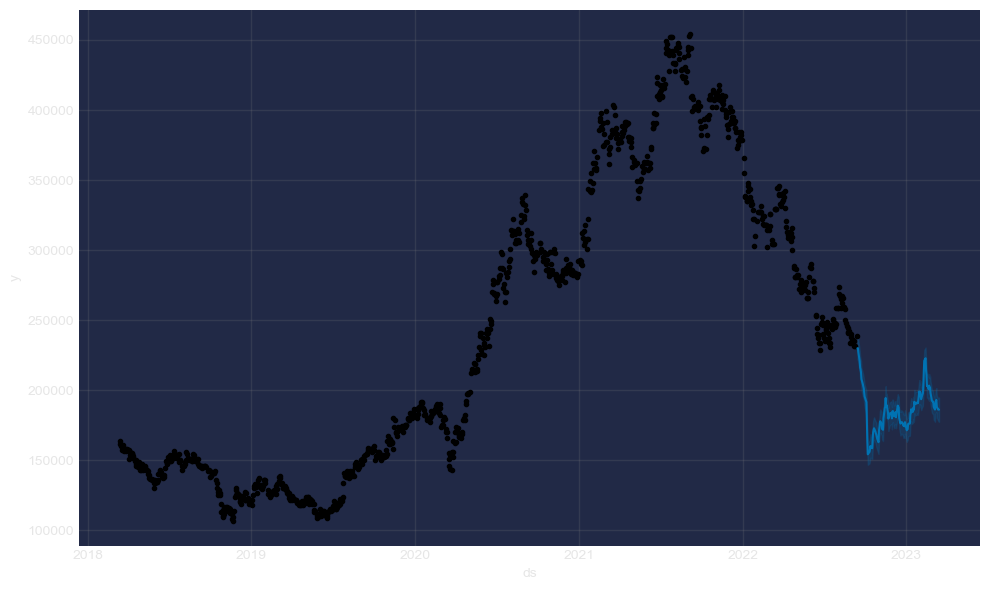

In [121]:
fig1 = model_fbprophet.plot(forecast)

c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Lee\.conda\envs\mecab\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.a

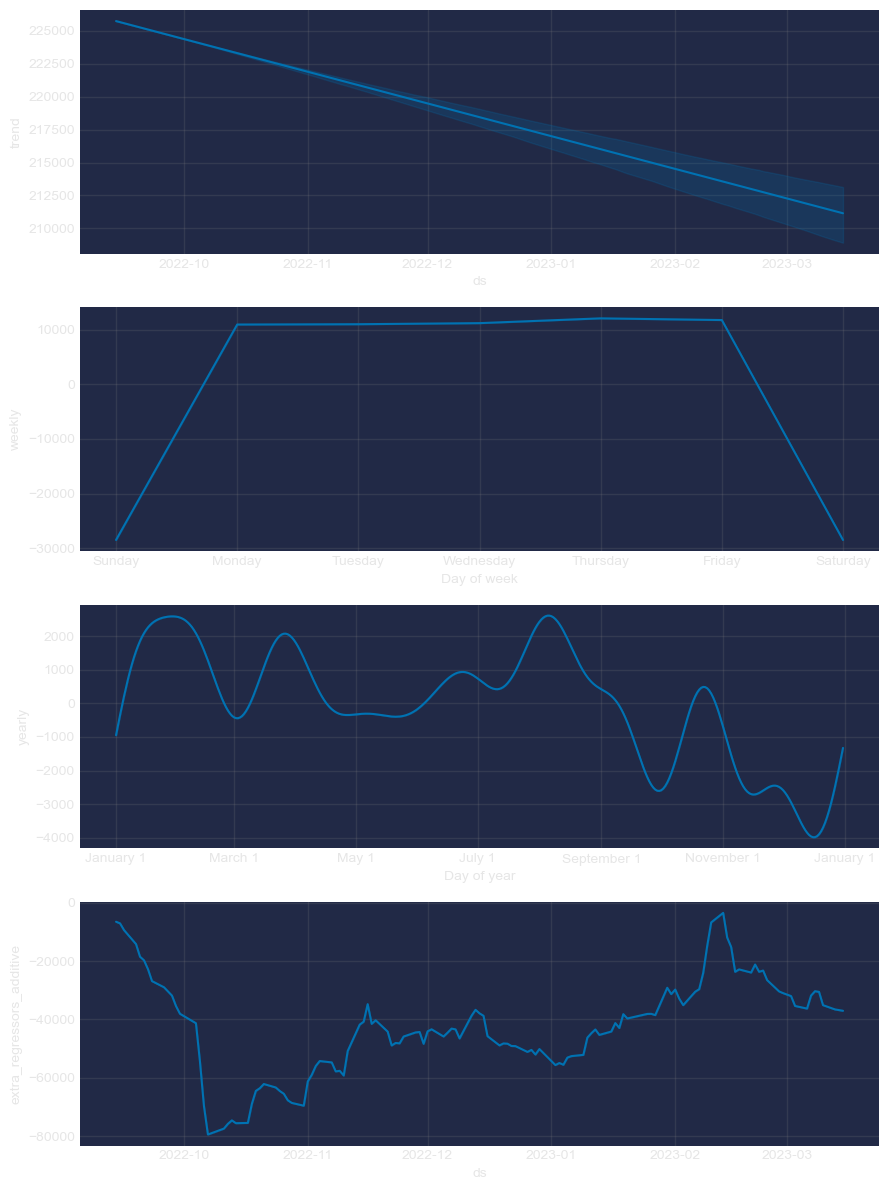

In [122]:
model_fbprophet.plot_components(forecast);

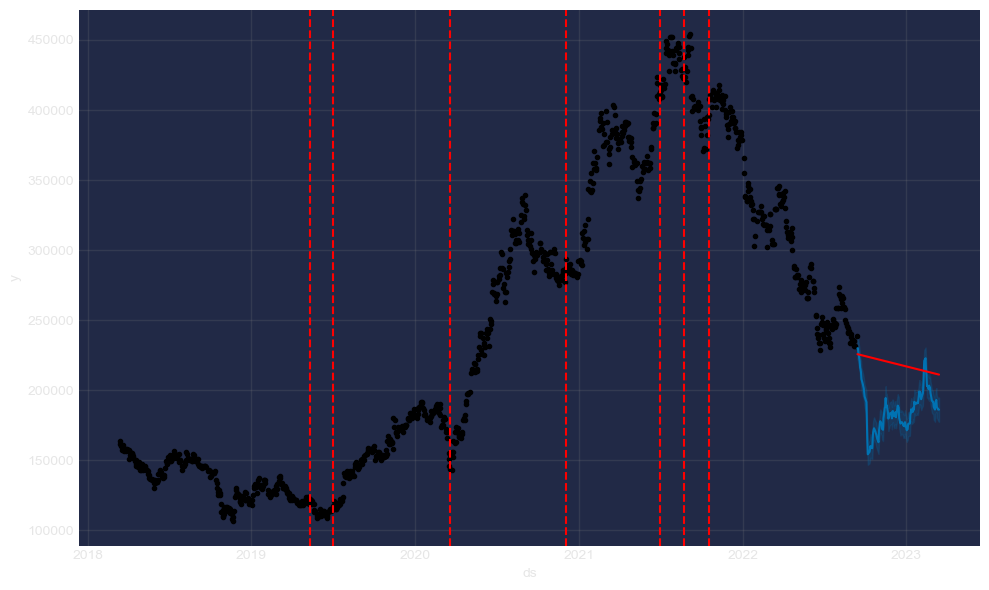

In [123]:
# Plotting changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbprophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbprophet, forecast)

In [216]:
data = data.set_index('date')
df_test = df_test.set_index('date')
data.index = data.index.tz_localize('Asia/Seoul')
df_test.index = df_test.index.tz_localize('Asia/Seoul')

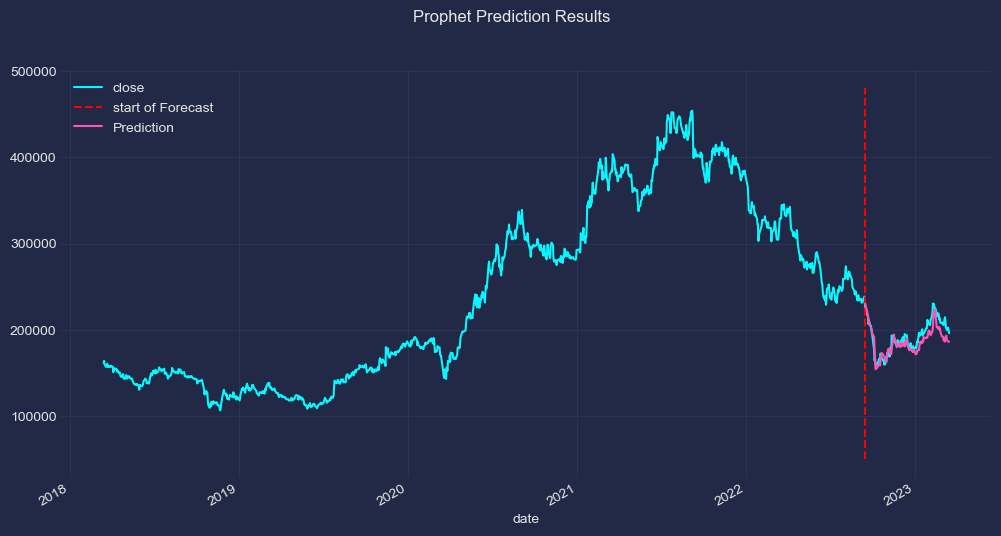

In [227]:
predict_index = df_test.index.to_list()
prediction_values = df_test['Forecast_Prophet'].values.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
data.close.plot(ax=ax);
ax.vlines('2022-09-14', 50000, 480000, linestyle='--', color='r', label='start of Forecast')
ax.plot(predict_index, prediction_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f'Prophet Prediction Results')
plt.show()

<Axes: xlabel='date'>

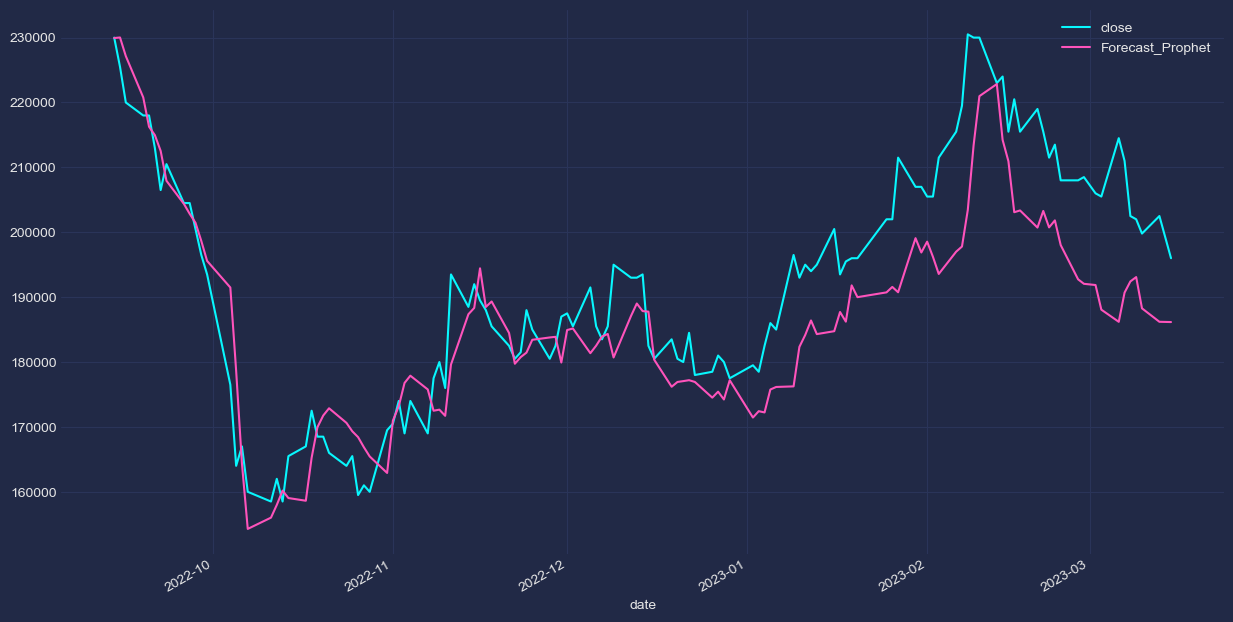

In [228]:
df_test[["close", "Forecast_Prophet"]].plot(figsize=(15, 8))

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [234]:
test_mae_prophet = mean_absolute_error(df_test['close'].values, forecast.yhat.values)
test_rmse_prophet = np.sqrt(mean_squared_error(df_test['close'].values, forecast.yhat.values))
test_r2_prophet = r2_score(df_test['close'].values, forecast.yhat.values)

print(f"test MAE ARIMA : {round(test_mae_prophet, 2)}")
print(f"test RMSE ARIMA : {round(test_rmse_prophet, 2)}")
print(f"test R2 ARIMA: {round(test_r2_prophet, 2)}")

test MAE ARIMA : 7555.16
test RMSE ARIMA : 9610.24
test R2 ARIMA: 0.73


In [246]:
eval_scores = pd.DataFrame([[round(test_mae_prophet, 2),round(test_rmse_prophet,2), round(test_r2_prophet,2)]],
                            index=['Prophet'],
                            columns = ['MAE', 'RMSE', 'R2'])

In [253]:
eval_scores_table = pd.read_csv('eval_scores.csv')
eval_scores_table = eval_scores_table.set_index('Unnamed: 0')
cat_eval = pd.concat([eval_scores_table, eval_scores])

In [261]:
cat_eval

,MAE,RMSE,R2
ARIMA,50678.47,53566.43,-7.42
Prophet,7555.16,9610.24,0.73


In [262]:
cat_eval.to_csv('eval_scores.csv')

In [263]:
df_eval_table = df_test[ "Forecast_Prophet"]
# df_eval_table.to_csv('df_eval_table.csv')

In [265]:
df_evals = pd.read_csv('df_eval_table.csv')
df_evals['Prophet'] = df_eval_table.values

In [277]:
df_evals.to_csv('df_eval_table.csv')